<a href="https://colab.research.google.com/github/sujaysavanth/statisticsfordata/blob/main/HypothesisA_Employment_Correlation_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🔍 Hypothesis A: Employment vs Energy Use Per Capita — Hypothesis Testing Only

This notebook performs hypothesis testing on the relationship between employment and energy use per capita using:

- Spearman correlation on raw data
- Spearman + Pearson correlation on log-transformed data


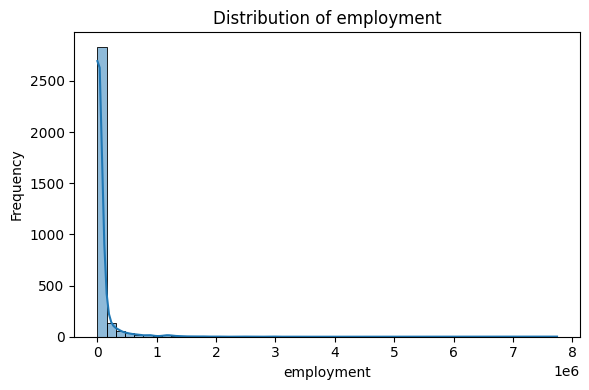


Shapiro-Wilk Test for 'employment': W=0.2311, p=0.0000
⚠️ 'employment' is NOT normally distributed.



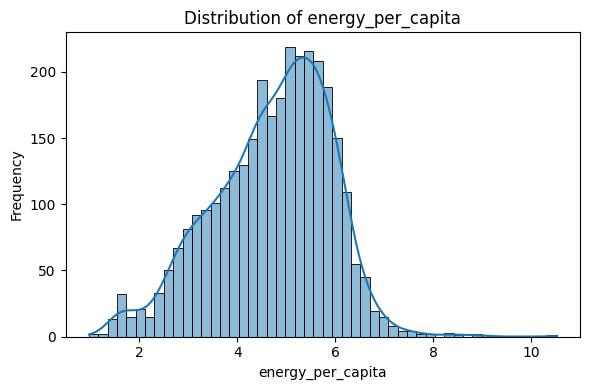


Shapiro-Wilk Test for 'energy_per_capita': W=0.9732, p=0.0000
⚠️ 'energy_per_capita' is NOT normally distributed.



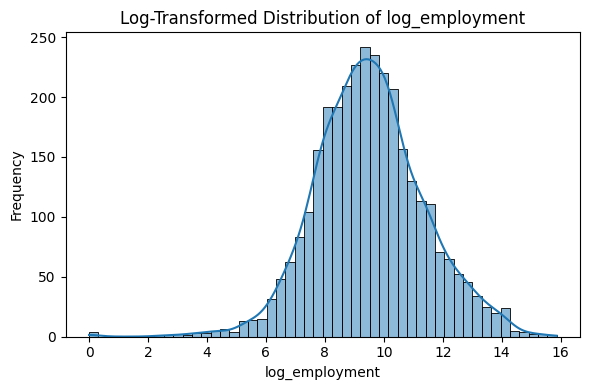


Shapiro-Wilk Test for 'log_employment': W=0.9913, p=0.0050
⚠️ 'log_employment' is still not normally distributed.



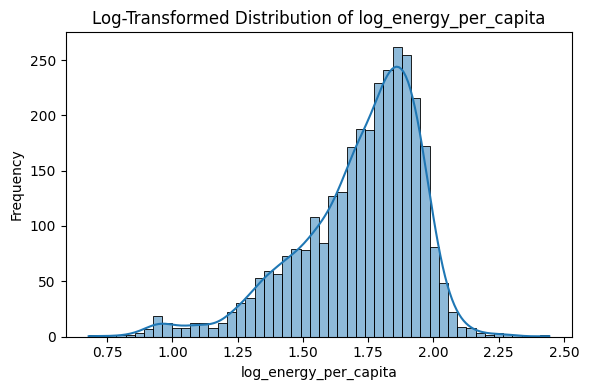


Shapiro-Wilk Test for 'log_energy_per_capita': W=0.9228, p=0.0000
⚠️ 'log_energy_per_capita' is still not normally distributed.

🔹 Correlation on ORIGINAL Data (ONLY Spearman):
Spearman (original): r = -0.2551, p = 0.0000
✅ Statistically significant (non-parametric)

🔹 Correlation on LOG-TRANSFORMED Data (Pearson + Spearman):
Spearman (log-log): r = -0.2551, p = 0.0000
✅ Statistically significant (non-parametric, log-log)

Pearson  (log-log): r = -0.2537, p = 0.0000
✅ Statistically significant (parametric, log-log)



In [2]:
# STEP 0: Install if needed
!pip install pyxlsb

# STEP 1: Load and clean County data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, spearmanr, pearsonr

file_path = "/content/2016cityandcountyenergyprofiles (1).xlsb"
county_data = pd.read_excel(file_path, engine='pyxlsb', sheet_name='County', skiprows=1)
county_data.columns = county_data.iloc[2]
county_data = county_data.drop([0, 1, 2]).reset_index(drop=True)

# STEP 2: Extract and clean required columns
mwh_capita_index = list(county_data.columns).index('consumption (MWh/capita)')

county_df = pd.DataFrame()
county_df['employment'] = pd.to_numeric(county_data['employment'], errors='coerce')
county_df['energy_per_capita'] = pd.to_numeric(county_data.iloc[:, mwh_capita_index], errors='coerce')
county_df.dropna(subset=['employment', 'energy_per_capita'], inplace=True)

# STEP 3: Check distribution of variables (Shapiro-Wilk)
for col in ['employment', 'energy_per_capita']:
    plt.figure(figsize=(6, 4))
    sns.histplot(county_df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    stat, p = shapiro(county_df[col].sample(500, random_state=42))
    print(f"\nShapiro-Wilk Test for '{col}': W={stat:.4f}, p={p:.4f}")
    if p > 0.05:
        print(f"✅ '{col}' appears to be normally distributed.\n")
    else:
        print(f"⚠️ '{col}' is NOT normally distributed.\n")

# STEP 4: Log transformation
county_df['log_employment'] = np.log1p(county_df['employment'])
county_df['log_energy_per_capita'] = np.log1p(county_df['energy_per_capita'])

# STEP 5: Check distributions after log transformation
for col in ['log_employment', 'log_energy_per_capita']:
    plt.figure(figsize=(6, 4))
    sns.histplot(county_df[col], kde=True, bins=50)
    plt.title(f'Log-Transformed Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    stat, p = shapiro(county_df[col].sample(500, random_state=42))
    print(f"\nShapiro-Wilk Test for '{col}': W={stat:.4f}, p={p:.4f}")
    if p > 0.05:
        print(f"✅ '{col}' now appears to be normally distributed.\n")
    else:
        print(f"⚠️ '{col}' is still not normally distributed.\n")

# STEP 6: Correlation Testing
print("🔹 Correlation on ORIGINAL Data (ONLY Spearman):")
s_corr, s_pval = spearmanr(county_df['employment'], county_df['energy_per_capita'])
print(f"Spearman (original): r = {s_corr:.4f}, p = {s_pval:.4f}")
if s_pval < 0.05:
    print("✅ Statistically significant (non-parametric)\n")
else:
    print("❌ Not statistically significant (non-parametric)\n")

print("🔹 Correlation on LOG-TRANSFORMED Data (Pearson + Spearman):")
# Spearman
s_log_corr, s_log_pval = spearmanr(county_df['log_employment'], county_df['log_energy_per_capita'])
print(f"Spearman (log-log): r = {s_log_corr:.4f}, p = {s_log_pval:.4f}")
if s_log_pval < 0.05:
    print("✅ Statistically significant (non-parametric, log-log)\n")
else:
    print("❌ Not statistically significant (non-parametric, log-log)\n")

# Pearson
p_log_corr, p_log_pval = pearsonr(county_df['log_employment'], county_df['log_energy_per_capita'])
print(f"Pearson  (log-log): r = {p_log_corr:.4f}, p = {p_log_pval:.4f}")
if p_log_pval < 0.05:
    print("✅ Statistically significant (parametric, log-log)\n")
else:
    print("❌ Not statistically significant (parametric, log-log)\n")



## ✅ Interpretation

This hypothesis test determines whether employment is correlated with energy consumption per capita.

- **Spearman** is used for monotonic relationship (non-parametric).
- **Pearson** is used on log-transformed data to test for linear correlation.

If p-values are below 0.05, the correlation is statistically significant.
